# Lecture 8 - Stochastic Processes, the Bernoulli Process and Random Walks

## L8.1 Stochastic processes

A **stochastic process** is a family of random random variables $\{X_t, t \in T\}$ where $T \subset \mathbb{R}$. When $T = \{1,2,3,...\}$ we say that $X_t$ is a discrete process ($X_1, X_2, ...$). When $T$ is an interval in $\mathbb{R}$ we say that $X_t$ is a continuous time stochastic process.

For every $\omega \in \Omega$, the function $t -> X_t(\omega)$ is a **path** or sample path of $X_t$.

A more informal defintion of a stochastic process is that it is probabilistic model of an experiment that evolves in time and generates a sequence of numerical values. Typical examples include:

1. Daily prices of a stock
2. Number of goals scored in a football match
3. Number of customers arriving in a store
4. The times between customer arrival in a store
5. Failure times of a machine

Each numerical value in the sequence is modelled as a random variable, so a stochastic process is just a sequence of random variables.

This involves much of the same ideas that we have already used, but in addition:

* We are interested in past dependencies - will the next value depend on the past values
* We are also interested in long term average - what fraction of the time is the machine broken
* What is a long term distribution of the values
* When is it optimal to stop the process - when that is applicable



## L8.2 Bernoulli processes

We start with the simplest process, the Bernoulli process. The **Bernoulli process** is a discrete stochastic process, $X_1, X_2, ...$ is a sequence of independent Bernoulli random variables with probability $p$ of getting 1 and $1-p$ of getting 0.

It is like a sequence of coin tosses. It could be used to model, e.g., the arrival of customers by minutes (will someone arrive at a particular minute or not), or arrivals of messages, etc. It could also signal whether someone (e.g., someone who has had a bit too much to drink) will walk forwards or backwards.

Let's create a path of the Bernoulli process

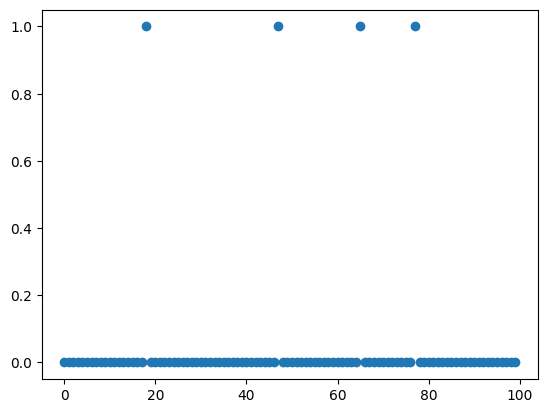

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

steps = 100
p = 0.05
path = np.random.binomial(size=steps, n=1, p=p)

plt.plot(path, 'o')

We may, e.g., be interested in number of arrivals in a certain time period. Suppose we are interested in the number of arrivals between times 6 and 10, $A = X_6 + X_7 + X_8 + X_9 + X_{10}$. These are 5 independent Bernoullis, so the number of arrivals is distributed as binomial(5,p) (P(A = i) = prob of i successes in 5 tries). This also means that the expected numer of arrivals is $E[A] = 5p$.

Arrivals in two non-overlapping periods are independent, and the process has the **fresh start** property, i.e., if we have run the process for $n$ steps already, then that will not have any impact on the future process. $X_{n+1}, X_{n+2}, ...$ is just like a new Bernoulli process. 

Now, let's talk about the time $T$, until the first arrival. This, if you recall, leads to the geometric random variable where $P(T=t) = (1-p)^{t-1}p$.

Now, suppose we have been watching the process for $n$ time steps, and nobody has arrived. Does that indicate that the first customer must be arriving soon (since no one has arrived yet)? In other words, does that indicate the the probability of having to wait longer is now lower than it was before?

No, not in the case of the Bernoulli process:
$P(T-n=t|T > n) = (1-p)^{t-1}p = P(T=t)$

This property is called **memorylessness** property of the process. Let's check to see if that is true... Let's compute the expected waiting time for the first customer, both from the start, and after having waited 5 steps without a customer. The theoretical expected value is $1/p$.

In [55]:
#Monte Carlo experiment of the memorylessness property
import random
p=0.1
print("Theoretical average wait time starting at 0: ",1/p)

N = 100000

#First, start at 0
wait_times = []
for i in range(N):
    x = 0
    steps = 0
    while x == 0:
        x = 1 if random.random() < p else 0
        steps += 1
    wait_times.append(steps)
    
print("Average wait time starting at 0: ",sum(wait_times)/N)
    
#Then, only take paths that have no arrivals in the first 5 steps
wait_times = []
for i in range(N):
    path1_5 = np.random.binomial(size=5, n=1, p=p)
    
    if sum(path1_5) == 0:
        x = 0
        steps = 0
        while x == 0:
            x = 1 if random.random() < p else 0
            steps += 1
        wait_times.append(steps)
    
print("Average wait time starting at 5: ",sum(wait_times)/len(wait_times))

Theoretical average wait time starting at 0:  10.0
Average wait time starting at 0:  10.0077
Average wait time starting at 5:  10.014167950302149


In [126]:
for i in range(15):
    k = np.random.binomial(n = 10, p = 0.7, size = 1)
    # prints number of successes
    print(k)

[7]
[5]
[8]
[7]
[9]
[6]
[8]
[5]
[8]
[3]
[9]
[8]
[8]
[7]
[6]


## L8.3 Random Walks

A **random walk** is the process of partial sums of a discrete stochastic process, i.e., it is the process ${S_1, S_2, ...}$ where 

$$S_n = \sum_{i=1}^n{X_i}$$

In the case we have looked at so far, $S_n$ represents the number of customers that have arrived at time $n$. As we saw earlier, this has a binomial(n,p) distribution, with expected value $np$.

Another common random walk is when $X_i$ is +1 with probability 0.5 and -1 with probability 0.5. This is the drunken man walking backwards and forwards.

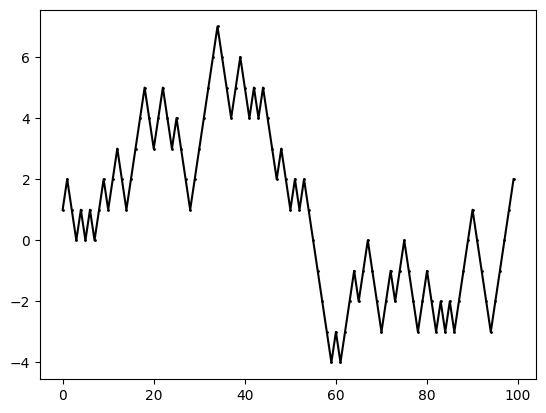

In [155]:
#A single path
path_size = 100

path = []
S = 0
p = 0.5 #Try chaning this one
for i in range(path_size):
    x = 1 if random.random() < p else -1
    S += x
    path.append(S)
    
plt.plot(path, marker = 'o', markersize = 1.0, color = 'black')

P = 0.34


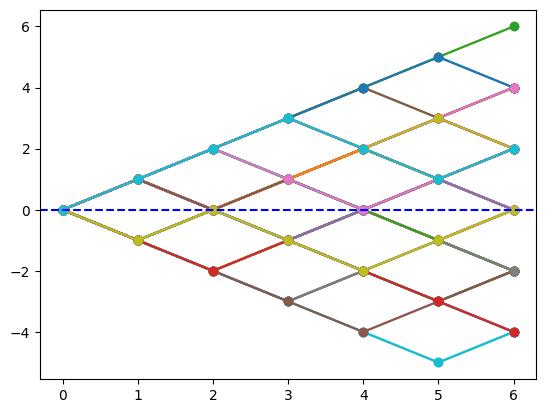

In [31]:
path_size = 6
p = 0.5 # Try changing this one
N = 100

zero_count = 0

for k in range(N):
    path = [0]
    S = 0
    for i in range(path_size):
        x = 1 if random.random() < p else -1
        S += x
        path.append(S)
    
    if S == 0:
        zero_count += 1
    plt.plot(path, marker='o')

print(f"P = {zero_count/N}")

# Add a horizontal line at y=0
plt.axhline(y=0, color='b', linestyle='--')

plt.show()

In [45]:
from math import factorial as fa

nnn = 100
half = int(nnn/2)
p = 0.5
ans = (fa(nnn)/(fa(half)*fa(half)))*(p**(half))*(1-p)**(half)
print(ans)
print((1-ans)/2)

0.07958923738717877
0.46020538130641064


We can put this into the context of the central limit theorem. We are dealing with partial sums, and if we assume iid $X_i$ with mean $\mu$ and variance $\sigma^2$, then the random walk variable $S_n$ will have an approximate normal distribution with mean $n\mu$ and variance $n\sigma^2$.

We can explore that in Monte Carlo as well...

1.0


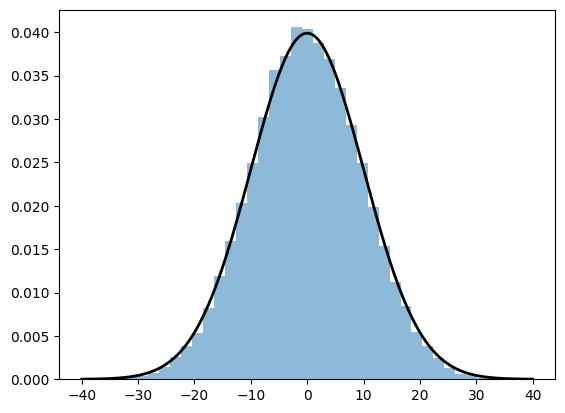

In [161]:
from scipy.stats import norm

N = 50000
n = 100
p=0.5
samples=[]

for i in range(N):
    S = 0
    for k in range(n):
        x = 1 if random.random() < p else -1
        S += x
    samples.append(S)
    
plt.hist(samples,bins = 40,density=True,alpha=0.5)
mu = p*1+(1-p)*(-1)
sigma = np.sqrt(p*(1-mu)**2 + (1-p)*(-1-mu)**2)
print(sigma)
x = np.linspace(-40, 40, 200)
p = norm.pdf(x,100 * mu, np.sqrt(n)*sigma)
  
plt.plot(x, p, 'k', linewidth=2)
plt.show()

This thoughts lead to the concept of diffusion.

Diffusion is the movement of anything (e.g., particles, people, ideas, heat) from where there are more to where there are less. This movement occurs until particles are evenly spread out. The word diffusion derives from the Latin word, diffundere, which means "to spread out." Diffusion is normally explained using the partial differential equation (this is 1-D version):

$$u_t = ku_{xx}$$

When $k=1/2$, one solution to this equation is the following scaled pdf of the normal distribution:

$$f(x) = \frac{1}{\sqrt{2\pi t}}e^{\frac{-x^2}{2t}}$$

and it is interesting to see what happens as t grow. Below is the approximate pdf of a symmetric random walk after t steps, and we see how things spread out.

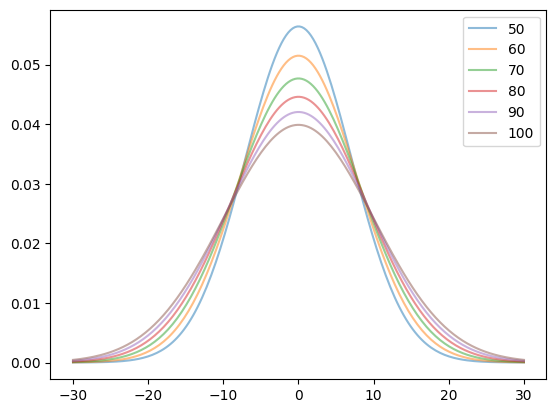

In [8]:
n=100
mu=0
sigma = np.sqrt(p*(1-mu)**2 + (1-p)*(-1-mu)**2)
t = list(range(50,110,10))
x = np.linspace(-30, 30, 200)
pdfs = [norm.pdf(x,0, np.sqrt(tt)*sigma) for tt in t]

for (tt,pdf) in zip(t,pdfs):
    plt.plot(x,pdf,alpha=0.5,label=tt)
plt.legend()

We can also consider a random walk with normally distributed steps. We know that the sum of iid normals is again normal, so the distribution of the random walk will be very similar to the simple random walk, particularly when the steps are many (we will see a similar theme when we talk about discrete approximations to derivative pricing).

### Exercise: Find the mean and std dev of the $t$-th step of the random walk with standard normal steps. 

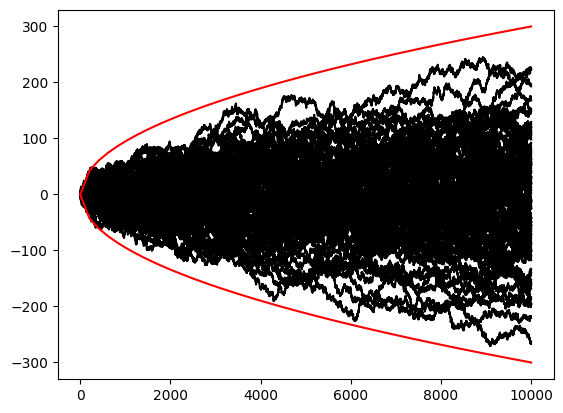

In [212]:
#A single path
path_size = 10000


m = 100
for j in range(m):
    mu = 0.0
    sigma = 1.0
    S = 0
    path = []
    for i in range(path_size):
        x = np.random.normal(mu, sigma, 1)[0]
        S += x
        path.append(S)
    plt.plot(path, color = 'black')
x = np.linspace(0, path_size)
plt.plot(x, 3*np.sqrt(x)*sigma, color = 'red')
plt.plot(x, -3*np.sqrt(x)*sigma, color = 'red')
#plt.plot(x, x)
plt.show()

This processs is closely related to the Brownian Motion process (which is not discrete but continuous). Brownian motions start at 0 and, after time $t$, they are normally distributed with mean 0 and variance $t$.

## Homework

1. Suppose we have a Bernoulli Process with probability = 0.1. What is the expected waiting time for the second customer? What is the expected waiting waiting time for the $n$-th customer?

2. Suppose we have a Bernoulli Process with probability = 0.1 and create the associated random walk $S_n$. Suppose $S_3$ = 2. Given that information, what is the probability that $S_5 = 2$?

3. Suppose we random walk, $S_n = \sum_{i=1}^n{X_i}$ starting at $S_0$ = 0, and $X_i$ = 1 with probability 0.5 and $X_i$ = -1 with probability 0.5. What is the probability that $S_5=0$? What is the probability that $S_6 = 0$? What is the probability that $S_{100} > 0$?

In [276]:
#Monte Carlo experiment of the memorylessness property
import random
p=0.1
print("Theoretical expected waiting time for first customer ", 1*1/p)
print("Theoretical expected waiting time for second customer ", 2*1/p)
N = 1000

#First, start at 0
wait_times_first = []
wait_times_second = []
for i in range(N):
    x = 0
    steps = 0
    while x == 0:
        x = 1 if random.random() < p else 0
        steps += 1
    wait_times_first.append(steps)
    x = 0
    while x == 0:
        x = 1 if random.random() < p else 0
        steps += 1
    wait_times_second.append(steps)
print("Average wait time starting for first customer: ",sum(wait_times_first)/N)
print("Average wait time starting for second customer: ",sum(wait_times_second)/N)

Theoretical expected waiting time for first customer  10.0
Theoretical expected waiting time for second customer  20.0
Average wait time starting for first customer:  10.111
Average wait time starting for second customer:  20.295
